In [224]:
import os
import pandas as pd
#function to format the data 
def get_data(file_name):
    columns=['date','max_temp','min_temp','precipitation'] 
    file_path = os.path.join('..',"/Users/Downloads/DataSciTest/wx_data",file_name)
    data = open(file_path).readlines()
    data_1 = []
    for row in data:
        data_1.append(dict(zip(columns,[i.strip('\n') for i in row.split('\t')])))
    df = pd.DataFrame(data_1)
    return df
result = []
for x in os.listdir(os.path.join('..','/Users/Downloads/DataSciTest/wx_data')):
    df = get_data(x)
    count = df[(df['precipitation']=='-9999') & (df['max_temp']!='-9999') & (df['min_temp']!="-9999")].count()['date']
    result.append("{0}\t{1}".format(x,count))
    result.sort()
result_data = "\n".join(result)
#creating the output file and writing it as txt file for reading purpose
output_path = os.path.join('..','/Users/Downloads/DataSciTest/answers','MissingPrcpData.out.txt')
f=open(output_path,'w')
#writing the data into the ouput file
f.write(result_data)
f.close()

In [225]:
import datetime
import os
import pandas as pd
#function to format the data 
def get_data(file_name):
    columns=['date','max_temp','min_temp','precipitation']
    file_path = os.path.join('..',"/Users/Downloads/DataSciTest/wx_data",file_name)
    data = open(file_path).readlines()
    data_1 = []
    for row in data:
        data_1.append(dict(zip(columns,[i.strip('\n') for i in row.split('\t')])))
    df = pd.DataFrame(data_1)
    return df[(df['precipitation']!='-9999') &
                     (df['max_temp']!='-9999') & 
                     (df['min_temp']!="-9999")]
    
result = []
for x in os.listdir(os.path.join('..','/Users/Downloads/DataSciTest/wx_data')):
    df = get_data(x)
    df.dropna() # dropping the null values
    df['date'] = pd.to_datetime(df['date']) # converting date to date format
    df['year'] = pd.DatetimeIndex(df['date']).year
    df['year'] = df['year'].astype(float) # converting year format to float values to get the mean values
    df['max_temp']=list(map(float,df['max_temp'].values))
    df['min_temp']=list(map(float,df['min_temp'].values))
    df['precipitation']=list(map(float,df['precipitation'].values))
    mean = df.groupby(['year']).mean()
    total = df.groupby('year').sum()
    maxtemp_mean  = mean['max_temp']
    mintemp_mean = mean['min_temp']
    total_precipitation = total['precipitation']
    for y in range(0,len(maxtemp_mean)):
        result.append("{0}\t{1}\t{2:.2f}\t{3:.2f}\t{4:.2f}".format(x,
                                                              total_precipitation.index[y],
                                                              maxtemp_mean.values[y],
                                                              mintemp_mean.values[y],
                                                             total_precipitation.values[y])) # calculating mean for each year in each report  as i couldnt get which year to tke from the question
    
        result.sort()
result = map(lambda x:x+"\n",result)
f=open(os.path.join('..','/Users/Downloads/DataSciTest/answers','YearlyAverages.out.txt'),'w')
f.writelines(result)
f.close()
    

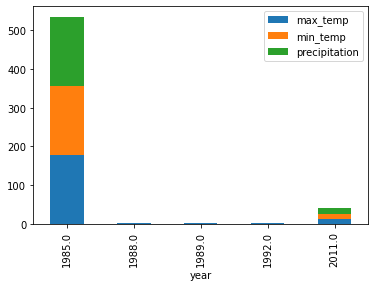

In [226]:
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
#function to format the data 
def get_data(file_name):
    columns=['station','year','max_temp','min_temp','precipitation']
    file_path = os.path.join('..',"/Users/Downloads/DataSciTest/answers",file_name)
    data = open(file_path).readlines()
    data_1 = []
    for row in data:
        data_1.append(dict(zip(columns,[i.strip('\n') for i in row.split('\t')])))
    df = pd.DataFrame(data_1)
    return df[(df['precipitation']!='-9999') & 
                     (df['max_temp']!='-9999') & 
                     (df['min_temp']!="-9999")]
    
df = get_data('YearlyAverages.txt')
df['max_temp']=list(map(float,df['max_temp'].values))
df['min_temp']=list(map(float,df['min_temp'].values))
df['precipitation']=list(map(float,df['precipitation'].values))
max_temp = df['max_temp'].max()
min_temp = df['min_temp'].min() 
total_precipitation = df['precipitation'].max()
data_max_temp = df[df['max_temp']==max_temp]
data_min_temp = df[df['min_temp']==min_temp]
data_total_precipitation = df[df['precipitation'] == total_precipitation]
data_maximum_temp = data_maximum_temp.append(data_min_temp,ignore_index=True)
data_maximum_temp = data_maximum_temp.append(data_total_precipitation,ignore_index=True)
result = data_maximum_temp.groupby('year').count()
result[['max_temp','min_temp','precipitation']].plot(kind="bar",stacked=True)
plt.savefig(os.path.join('..','/Users/Downloads/DataSciTest/answers','YearHistogram.png'))
plt.show()
data_1 = []
for year in result.index:
	max_count = result['max_temp'].loc[year]
	min_count = result['min_temp'].loc[year]
	totalpre_count = result['precipitation'].loc[year]
	data_1.append("{0}\t{1}\t{2}\t{3}\n".format(year,max_count,min_count,totalpre_count))
f=open(os.path.join('..','/Users/Downloads/DataSciTest/answers','YearHistogram.out.txt'),'w')
f.writelines(data_1)
f.close()
                                                                                             

In [227]:
import datetime
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#function to format the data 
def get_data(file_name):
    columns=['station','year','max_temp','min_temp','precipitation']
    file_path = os.path.join('..',"/Users/Downloads/DataSciTest/answers",file_name)
    data = open(file_path).readlines()
    data_1 = []
    for row in data:
        data_1.append(dict(zip(columns,[i.strip('\n') for i in row.split('\t')])))
    df = pd.DataFrame(data_1)
    df = df[(df['precipitation']!=-9999) & 
                     (df['max_temp']!=-9999) & 
                     (df['min_temp']!=-9999)]
    df['max_temp']=list(map(float,df['max_temp'].values))
    df['min_temp']=list(map(float,df['min_temp'].values))
    df['precipitation']=list(map(float,df['precipitation'].values))
    df['sq_max_temp'] = df['max_temp']**2
    df['sq_min_temp'] = df['min_temp']**2
    df['sq_precipitation'] = df['precipitation']**2
    df['p_max_temp_min_temp'] = df['max_temp']*df['min_temp']
    df['p_min_temp_precipitation'] = df['min_temp']*df['precipitation']
    df['p_max_temp_precipitation'] = df['max_temp']*df['precipitation']
    return df
    
df = get_data('YearlyAverages.txt')
df_group_year_sum = df.groupby("year").sum()
N = df.groupby("year").count()['max_temp']
sum_p_max_tmp= df_group_year_sum['max_temp']
sum_p_min_tmp = df_group_year_sum['min_temp']
sum_precipitation = df_group_year_sum['precipitation']
sum_max_min=df_group_year_sum['p_max_temp_min_temp']
sum_min_precipitation=df_group_year_sum['p_min_temp_precipitation']
sum_max_precipitation=df_group_year_sum['p_max_temp_precipitation']
sum_sq_max=df_group_year_sum['sq_max_temp']
sum_sq_min=df_group_year_sum['sq_min_temp']
sum_sq_pre=df_group_year_sum['sq_precipitation']
max_min_factor = []
min_pre_factor = []
max_pre_factor = []
for year in df_group_year_sum.index:
    fact_numerator = (N*sum_p_max_min.loc[year])-(sum_max_tmp.loc[year]*sum_min_tmp.loc[year])
    fact_denominator = np.sqrt(((N*sum_sq_max.loc[year])-(sum_max_tmp.loc[year]**2))*((N*sum_sq_min.loc[year])-(sum_min_tmp.loc[year]**2)))
    max_min_factor.append({year:"%.2f"%(fact_numerator[0]/fact_denominator[0])})
    fact_numerator = (N*sum_p_min_pre.loc[year])-(sum_min_tmp.loc[year]*sum_pre.loc[year])
    fact_denominator = np.sqrt(((N*sum_sq_min.loc[year])-(sum_min_tmp.loc[year]**2))*((N*sum_sq_pre.loc[year])-(sum_pre.loc[year]**2)))
    min_pre_factor.append({year:"%.2f"%(fact_numerator[0]/fact_denominator[0])})
    fact_numerator = (N*sum_p_max_pre.loc[year])-(sum_max_tmp.loc[year]*sum_pre.loc[year])
    fact_denominator = np.sqrt(((N*sum_sq_max.loc[year])-(sum_max_tmp.loc[year]**2))*((N*sum_sq_pre.loc[year])-(sum_pre.loc[year]**2)))
    max_pre_factor.append({year:"%.2f"%(fact_numerator[0]/fact_denominator[0])})
f=open(os.path.join('..','/Users/Downloads/DataSciTest/answers','Correlations.out.txt'),'w')
f.write("year\tmax_min_factor\tmin_pre_factor\tmax_pre_factor\n")
for year,max_min,min_pre,max_pre in zip(df_group_year_sum.index,max_min_factor,min_pre_factor,max_pre_factor):
    f.write("{0}\t{1}\t{2}\t{3}\n".format(year,max_min[year],min_pre[year],max_pre[year]))
f.close()


                                                                                             

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
